In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adult = pd.read_csv("/home/umut/python_calismalar/adult.csv")
adult.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
print(adult["Marital Status"].describe())
print(adult["Marital Status"].value_counts(normalize=True))

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: Marital Status, dtype: float64


In [5]:
# Object veri tipinden categorical veri tipine geçiş.
print(adult["Marital Status"].dtype)
adult["Marital Status"] = adult["Marital Status"].astype("category")
adult["Marital Status"].dtype

object


CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False)

In [6]:
# Creating a categorical series in pandas.
my_data = ["A","B","C","A","D","D","C","B","A","B"]
my_series1 = pd.Series(my_data, dtype="category")
my_series1

0    A
1    B
2    C
3    A
4    D
5    D
6    C
7    B
8    A
9    B
dtype: category
Categories (4, object): ['A', 'B', 'C', 'D']

In [7]:
# Creating a ordered categorical series in pandas.
my_series2 = pd.Categorical(my_data, categories=["B","C","A","D"], ordered=True)
my_series2

['A', 'B', 'C', 'A', 'D', 'D', 'C', 'B', 'A', 'B']
Categories (4, object): ['B' < 'C' < 'A' < 'D']

**CATEGORICAL** veri tipi çok az yer kaplar.

In [8]:
adult = pd.read_csv("/home/umut/python_calismalar/adult.csv")

In [9]:
print("Object veri tipindeyken kapladığı alan:",adult["Marital Status"].nbytes)

print("Categorical veri tipindeyken kapladığı alan:",adult["Marital Status"].astype("category").nbytes)

Object veri tipindeyken kapladığı alan: 260488
Categorical veri tipindeyken kapladığı alan: 32617


Bir veriyi çekerken birden çok sütun üzerinde dtype değişimi yapılacaksa aşağıdaki adımların izlenmesi mantıklıdır.

In [10]:
dtype_dict = {"Marital Status" : "category",
              "Education" : "category",
              "Age" : "int64"}

adult = pd.read_csv("/home/umut/python_calismalar/adult.csv", dtype=dtype_dict)
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              32561 non-null  int64   
 1   Workclass        32561 non-null  object  
 2   fnlgwt           32561 non-null  int64   
 3   Education        32561 non-null  category
 4   Education Num    32561 non-null  int64   
 5   Marital Status   32561 non-null  category
 6   Occupation       32561 non-null  object  
 7   Relationship     32561 non-null  object  
 8   Race             32561 non-null  object  
 9   Sex              32561 non-null  object  
 10  Capital Gain     32561 non-null  int64   
 11  Capital Loss     32561 non-null  int64   
 12  Hours/Week       32561 non-null  int64   
 13  Country          32561 non-null  object  
 14  Above/Below 50k  32561 non-null  object  
dtypes: category(2), int64(6), object(7)
memory usage: 3.3+ MB


In [11]:
adult.groupby(by="Above/Below 50k")[["Age", "Education Num"]].sum()

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


In [12]:
adult.groupby(by=["Above/Below 50k", "Marital Status"]).size()

Above/Below 50k  Marital Status        
 <=50K            Divorced                  3980
                  Married-AF-spouse           13
                  Married-civ-spouse        8284
                  Married-spouse-absent      384
                  Never-married            10192
                  Separated                  959
                  Widowed                    908
 >50K             Divorced                   463
                  Married-AF-spouse           10
                  Married-civ-spouse        6692
                  Married-spouse-absent       34
                  Never-married              491
                  Separated                   66
                  Widowed                     85
dtype: int64

In [13]:
dogs = pd.read_csv("/home/umut/python_calismalar/ShelterDogs.csv")
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

In [14]:
dogs["coat"] = dogs["coat"].astype("category")
dogs["coat"].value_counts(dropna=True)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [15]:
dogs["coat"] = dogs["coat"].cat.set_categories(
    new_categories=["short","medium","long"],
    ordered=True
)
dogs["coat"].value_counts(dropna=False) #çıkarttığımız kategoriyi de göstermesini sağladık.

short     1972
medium     565
NaN        220
long       180
Name: coat, dtype: int64

In [16]:
# Kategori silmek.
dogs = pd.read_csv("/home/umut/python_calismalar/ShelterDogs.csv", dtype = {"coat" : "category"})
dogs["coat"] = dogs["coat"].cat.remove_categories(removals=["wirehaired"])
dogs["coat"].cat.categories

Index(['long', 'medium', 'short'], dtype='object')

In [17]:
# Rename category
dogs["breed"] = dogs["breed"].astype("category")
print("degisimden önce\n",dogs["breed"].value_counts())
rename_dict = {"Unknown Mix" : "Unknown"}
dogs["breed"] = dogs["breed"].cat.rename_categories(rename_dict)
print("\ndegisimden sonra\n",dogs["breed"].value_counts())

degisimden önce
 Unknown Mix                                 1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: breed, Length: 277, dtype: int64

degisimden sonra
 Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                      

In [18]:
dogs["likes_children"] = dogs["likes_children"].astype("category")
# Use a lambda function to convert all categories to uppercase using upper()
dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
print(dogs["likes_children"].cat.categories)

Index(['NO', 'YES'], dtype='object')


In [19]:
dogs = pd.read_csv("/home/umut/python_calismalar/ShelterDogs.csv", dtype = {"coat" : "category"})

# Create the update_coats dictionary
update_coats = {"wirehaired" : "medium",
                "medium-long": "medium"}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype("category")

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


## Categorical verilerde yazım hataları gibi sorunlarla başa çıkmak.

In [20]:
dogs = pd.read_csv("/home/umut/python_calismalar/ShelterDogs.csv", dtype = {"coat" : "category"})

dogs["get_along_cats"] = dogs["get_along_cats"].str.strip()
dogs["get_along_cats"] = dogs["get_along_cats"].str.title()


In [21]:
dogs["breed"].str.contains("Shepherd", regex=False)

0       False
1       False
2       False
3       False
4       False
        ...  
2932    False
2933    False
2934    False
2935    False
2936     True
Name: breed, Length: 2937, dtype: bool

In [22]:
dogs.loc[dogs["get_along_cats"] == "Yes", "size"].value_counts(sort=False)

small      69
medium    169
large      37
Name: size, dtype: int64

In [23]:
print(dogs[dogs["breed"].str.contains("English", regex=False)].shape[0])

35


# Visualization of Categorical Data

In [4]:
reviews = pd.read_csv("/home/umut/python_calismalar/lasvegas_tripadvisor.csv")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

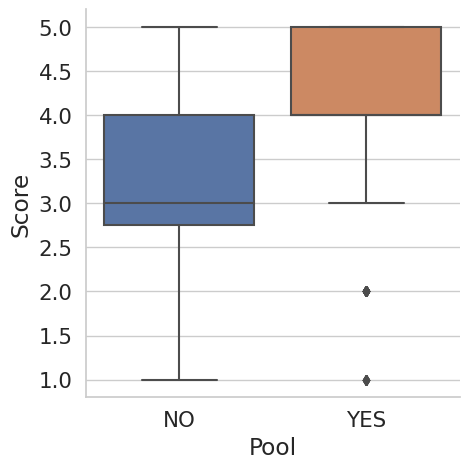

In [15]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(data=reviews, x="Pool",y="Score", kind="box")
plt.show()

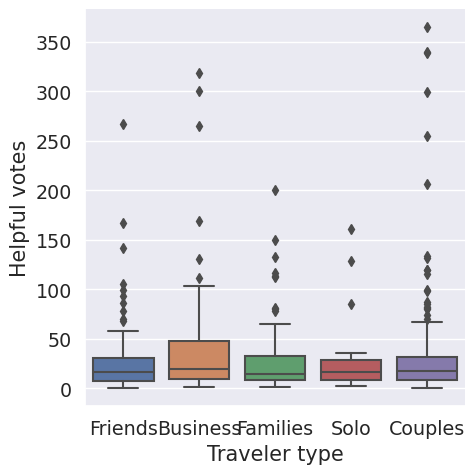

In [16]:
# Set the font size to 1.25
sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a boxplot
sns.catplot(data = reviews, x="Traveler type", y="Helpful votes", kind="box")

plt.show()

<AxesSubplot:>

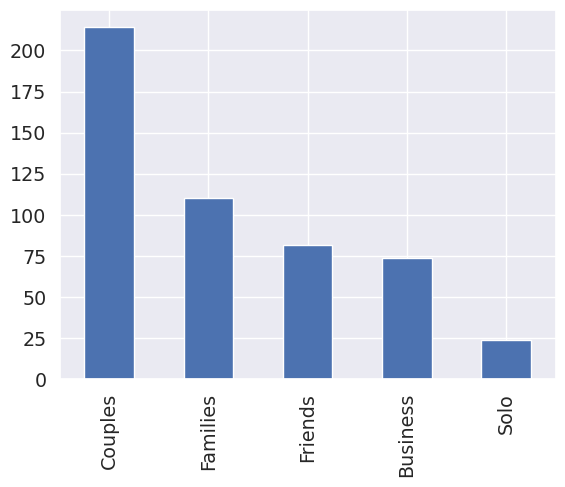

In [17]:
reviews["Traveler type"].value_counts().plot.bar()

Siyah çizgiler CI temsil ediyor.

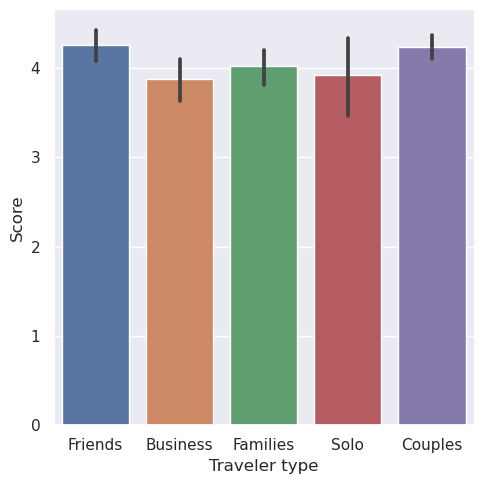

In [20]:
# Set the font size to 1.25
sns.set(font_scale=1)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a barplot
sns.catplot(data = reviews, x="Traveler type", y="Score", kind="bar")

plt.show()

Bu sefer grafiği bu sıraya göre verecek: Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')


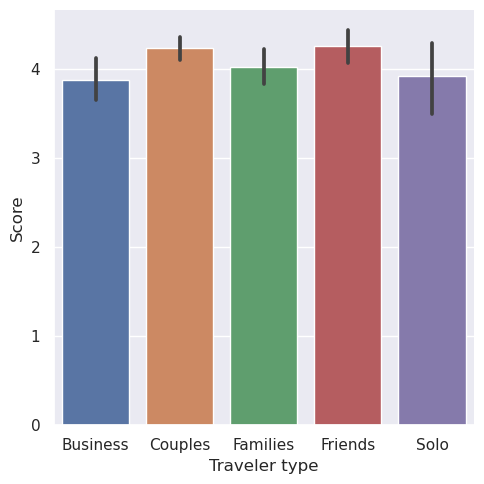

In [22]:
reviews["Traveler type"] = reviews["Traveler type"].astype("category")

print("Bu sefer grafiği bu sıraya göre verecek:",reviews["Traveler type"].cat.categories)

sns.catplot(data = reviews, x="Traveler type", y="Score", kind="bar")

plt.show()

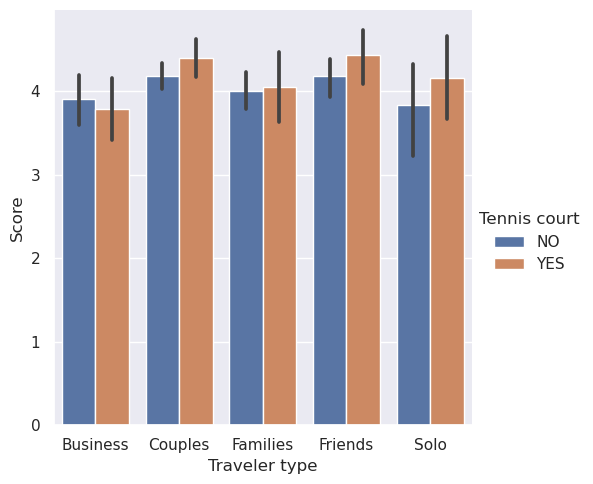

In [25]:
sns.catplot(x="Traveler type", y="Score", data=reviews, hue="Tennis court", kind="bar")
plt.show()

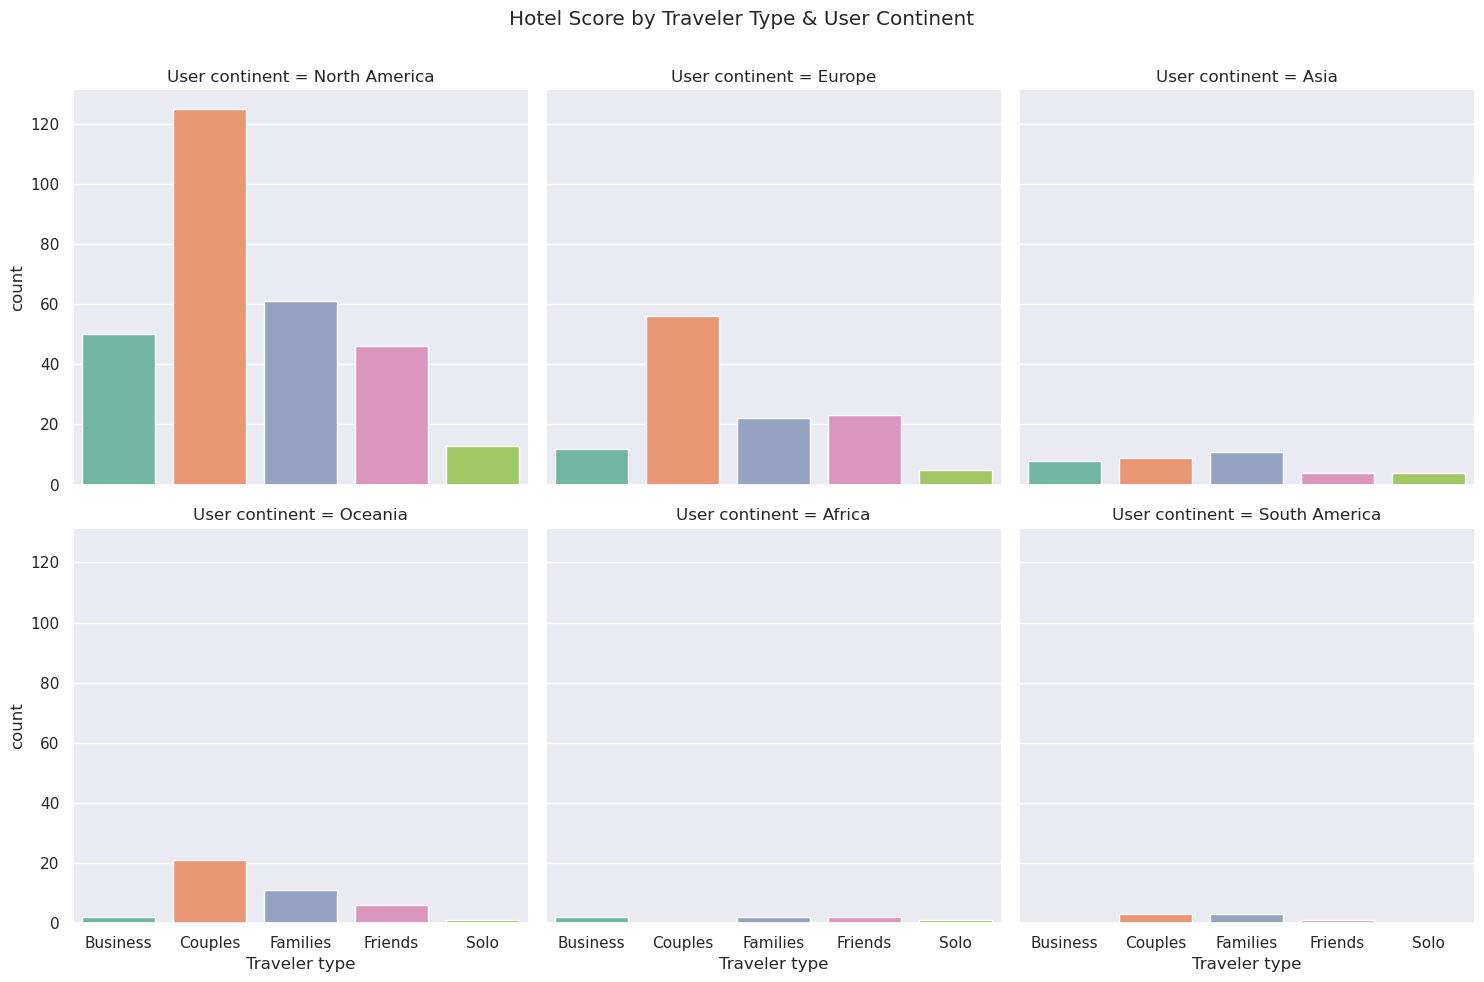

In [33]:
sns.set(font_scale=1)
ax = sns.catplot(x="Traveler type", col="User continent", col_wrap=3,
                 kind="count", palette=sns.color_palette("Set2"), data=reviews)
ax.fig.suptitle("Hotel Score by Traveler Type & User Continent")
ax.set_axis_labels(x="Traveler Type",y="Number of Reviews")
plt.subplots_adjust(top=0.9)
plt.show()

# Label encoding
Genelde anketlerde kullanılır.

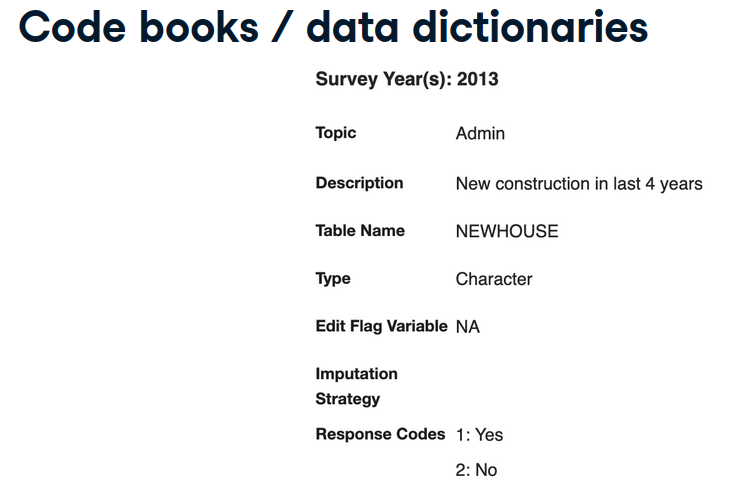

In [5]:
used_cars = pd.read_csv("/home/umut/python_calismalar/cars.csv")
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [7]:
used_cars["manufacturer_name"] = used_cars["manufacturer_name"].astype("category")

used_cars["manufacturer_code"] = used_cars["manufacturer_name"].cat.codes

print(used_cars[["manufacturer_name", "manufacturer_code"]])

      manufacturer_name  manufacturer_code
0                Subaru                 45
1                Subaru                 45
2                Subaru                 45
3                Subaru                 45
4                Subaru                 45
...                 ...                ...
38526          Chrysler                  8
38527          Chrysler                  8
38528          Chrysler                  8
38529          Chrysler                  8
38530          Chrysler                  8

[38531 rows x 2 columns]


In [8]:
# Code'ları eski haline çevirmek.
codes = used_cars["manufacturer_name"].cat.codes
categories = used_cars["manufacturer_name"]

name_map = dict(zip(codes,categories))
print(name_map)

{45: 'Subaru', 24: 'LADA', 12: 'Dodge', 54: 'УАЗ', 23: 'Kia', 35: 'Opel', 53: 'Москвич', 1: 'Alfa Romeo', 0: 'Acura', 10: 'Dacia', 27: 'Lexus', 33: 'Mitsubishi', 25: 'Lancia', 9: 'Citroen', 32: 'Mini', 21: 'Jaguar', 38: 'Porsche', 44: 'SsangYong', 11: 'Daewoo', 15: 'Geely', 50: 'ВАЗ', 13: 'Fiat', 14: 'Ford', 39: 'Renault', 42: 'Seat', 40: 'Rover', 48: 'Volkswagen', 28: 'Lifan', 22: 'Jeep', 5: 'Cadillac', 2: 'Audi', 52: 'ЗАЗ', 47: 'Toyota', 51: 'ГАЗ', 49: 'Volvo', 7: 'Chevrolet', 16: 'Great Wall', 4: 'Buick', 37: 'Pontiac', 29: 'Lincoln', 18: 'Hyundai', 34: 'Nissan', 46: 'Suzuki', 3: 'BMW', 30: 'Mazda', 26: 'Land Rover', 20: 'Iveco', 43: 'Skoda', 41: 'Saab', 19: 'Infiniti', 6: 'Chery', 17: 'Honda', 31: 'Mercedes-Benz', 36: 'Peugeot', 8: 'Chrysler'}


In [9]:
used_cars["manufacturer_code"].map(name_map)

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_code, Length: 38531, dtype: object

In [11]:
# boolean coding
used_cars["van_code"] = np.where(
    used_cars["body_type"].str.contains("van", regex=False),1,0)

used_cars["van_code"].value_counts()

0    34115
1     4416
Name: van_code, dtype: int64

# One hot encoding


In [14]:
used_cars_onehot = pd.get_dummies(used_cars[["odometer_value","color"]])
used_cars_onehot

,odometer_value,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,190000,0,0,0,0,0,0,0,0,1,0,0,0
1,290000,0,1,0,0,0,0,0,0,0,0,0,0
2,402000,0,0,0,0,0,0,0,1,0,0,0,0
3,10000,0,1,0,0,0,0,0,0,0,0,0,0
4,280000,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,0,0,0,0,0,0,0,0,1,0,0,0
38527,321000,0,1,0,0,0,0,0,0,0,0,0,0
38528,777957,0,1,0,0,0,0,0,0,0,0,0,0
38529,20000,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# used_cars'ın color sütununu sildi ve yerine 12 tane her renk için sütun işledi.
print(used_cars.shape)
pd.get_dummies(data=used_cars,columns=["color"], prefix="").head()

(38531, 32)


,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,_brown,_green,_grey,_orange,_other,_red,_silver,_violet,_white,_yellow
0,Subaru,Outback,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,...,0,0,0,0,0,0,1,0,0,0
1,Subaru,Outback,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,...,0,0,0,0,0,0,0,0,0,0
2,Subaru,Forester,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,...,0,0,0,0,0,1,0,0,0,0
3,Subaru,Impreza,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,...,0,0,0,0,0,0,0,0,0,0
4,Subaru,Legacy,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,...,0,0,0,0,0,0,0,0,0,0
